About he project:

In this project, we delve into a dataset encapsulating various health metrics from heart patients.

Including age,
blood pressure, heart rate,
and more.
 >Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

In [1]:
#load python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the dataset

heart = pd.read_csv("heart.csv")
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# the code below is use to check for duplicate value in the dataset
heart.duplicated().sum()

1

In [4]:
#drop duplicate
heart.drop_duplicates(inplace=True)

In this dataset we find 1 duplicate value out of 303 obs. the plan foward fron this is to removed the duplicate file

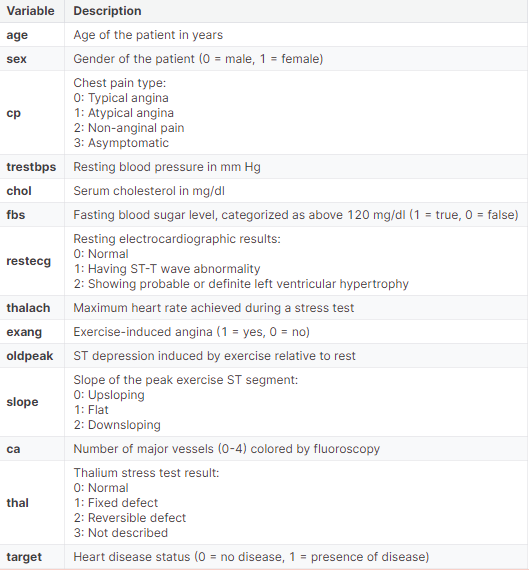

In [5]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no null value

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Correlation matrix is a square matrix showing the correlation coefficients between two variables. Correlation coefficients measure how strong and in which direction two variables are linked in a straight line. A correlation matrix often examines how different variables relate in multivariate analysis and statistics.

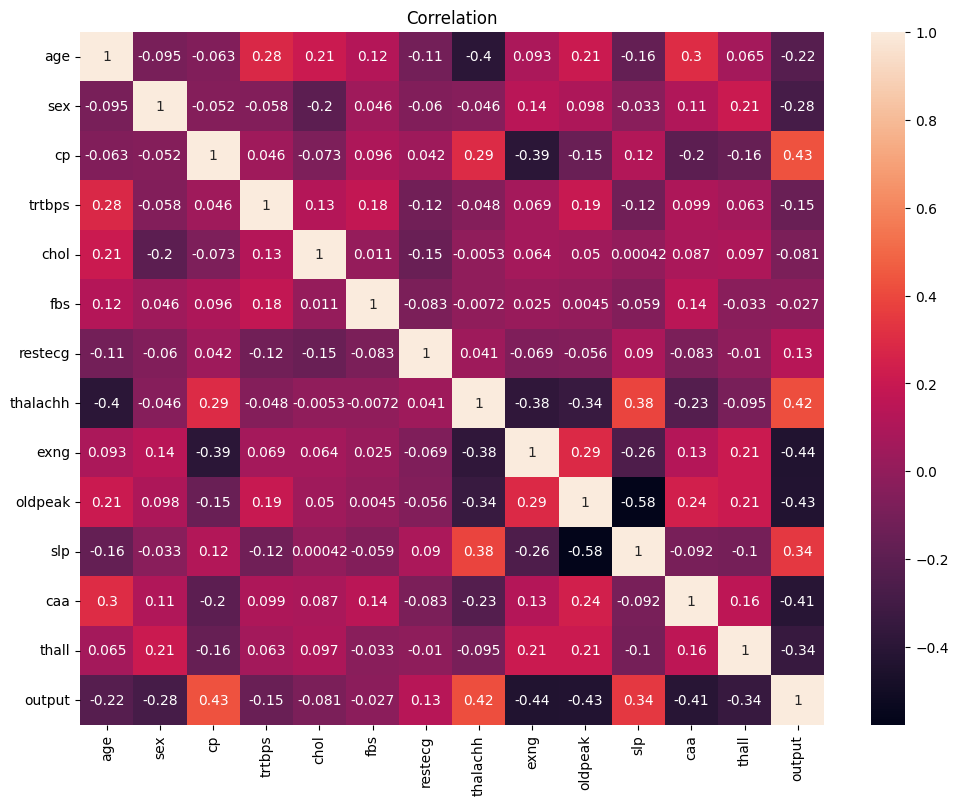

In [7]:
#Correlation matrix  
plt.figure(figsize=(12,9))
sns.heatmap(heart.corr(), annot=True)
plt.title("Correlation")
plt.show()

Will convert the following column into object for data Exploratory data analyst purpose(EDA)

In [8]:
#numerical features
numerical_features = ['age','trtbps', 'chol', 'thalachh','oldpeak' ]

# Identify the numerical features to be converted to object d.type

convert = [feature for feature in heart.columns if feature not in numerical_features]

# Convert the numerical features to object data type
heart[convert] = heart[convert].astype('object')

heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    object 
 11  caa       302 non-null    object 
 12  thall     302 non-null    object 
 13  output    302 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 35.4+ KB


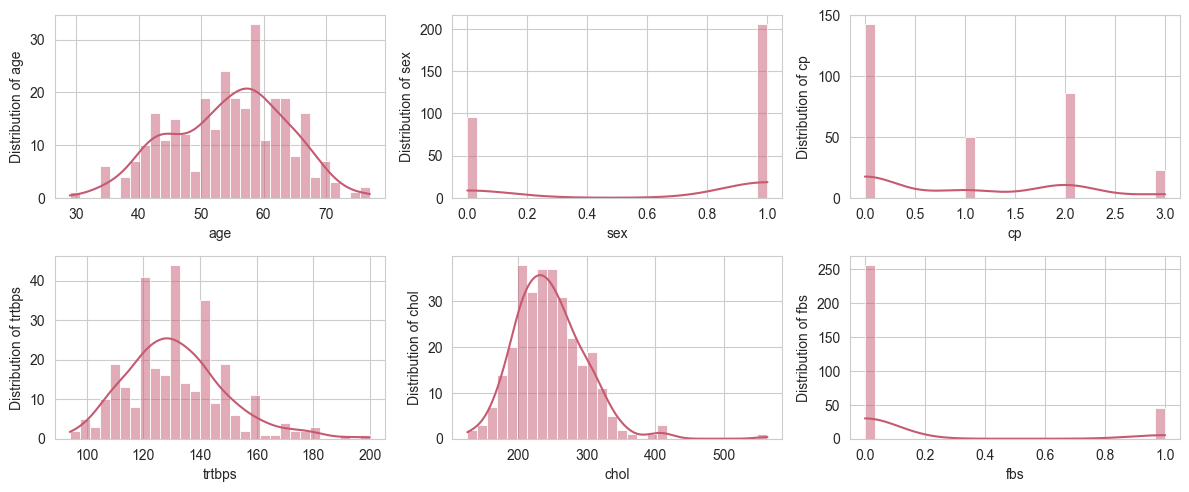

In [9]:
#  The following funcrion will show the distribution following column displaying below
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(heart.columns[:6],1):
    plt.subplot(3,3,i)
    sns.histplot(heart[column], bins=30, kde=True , color='#C55A71')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [10]:
heart.describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [11]:
# Filter out categorical features for the univariate analysis
categorical_features = heart[['sex', 'cp','fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']]


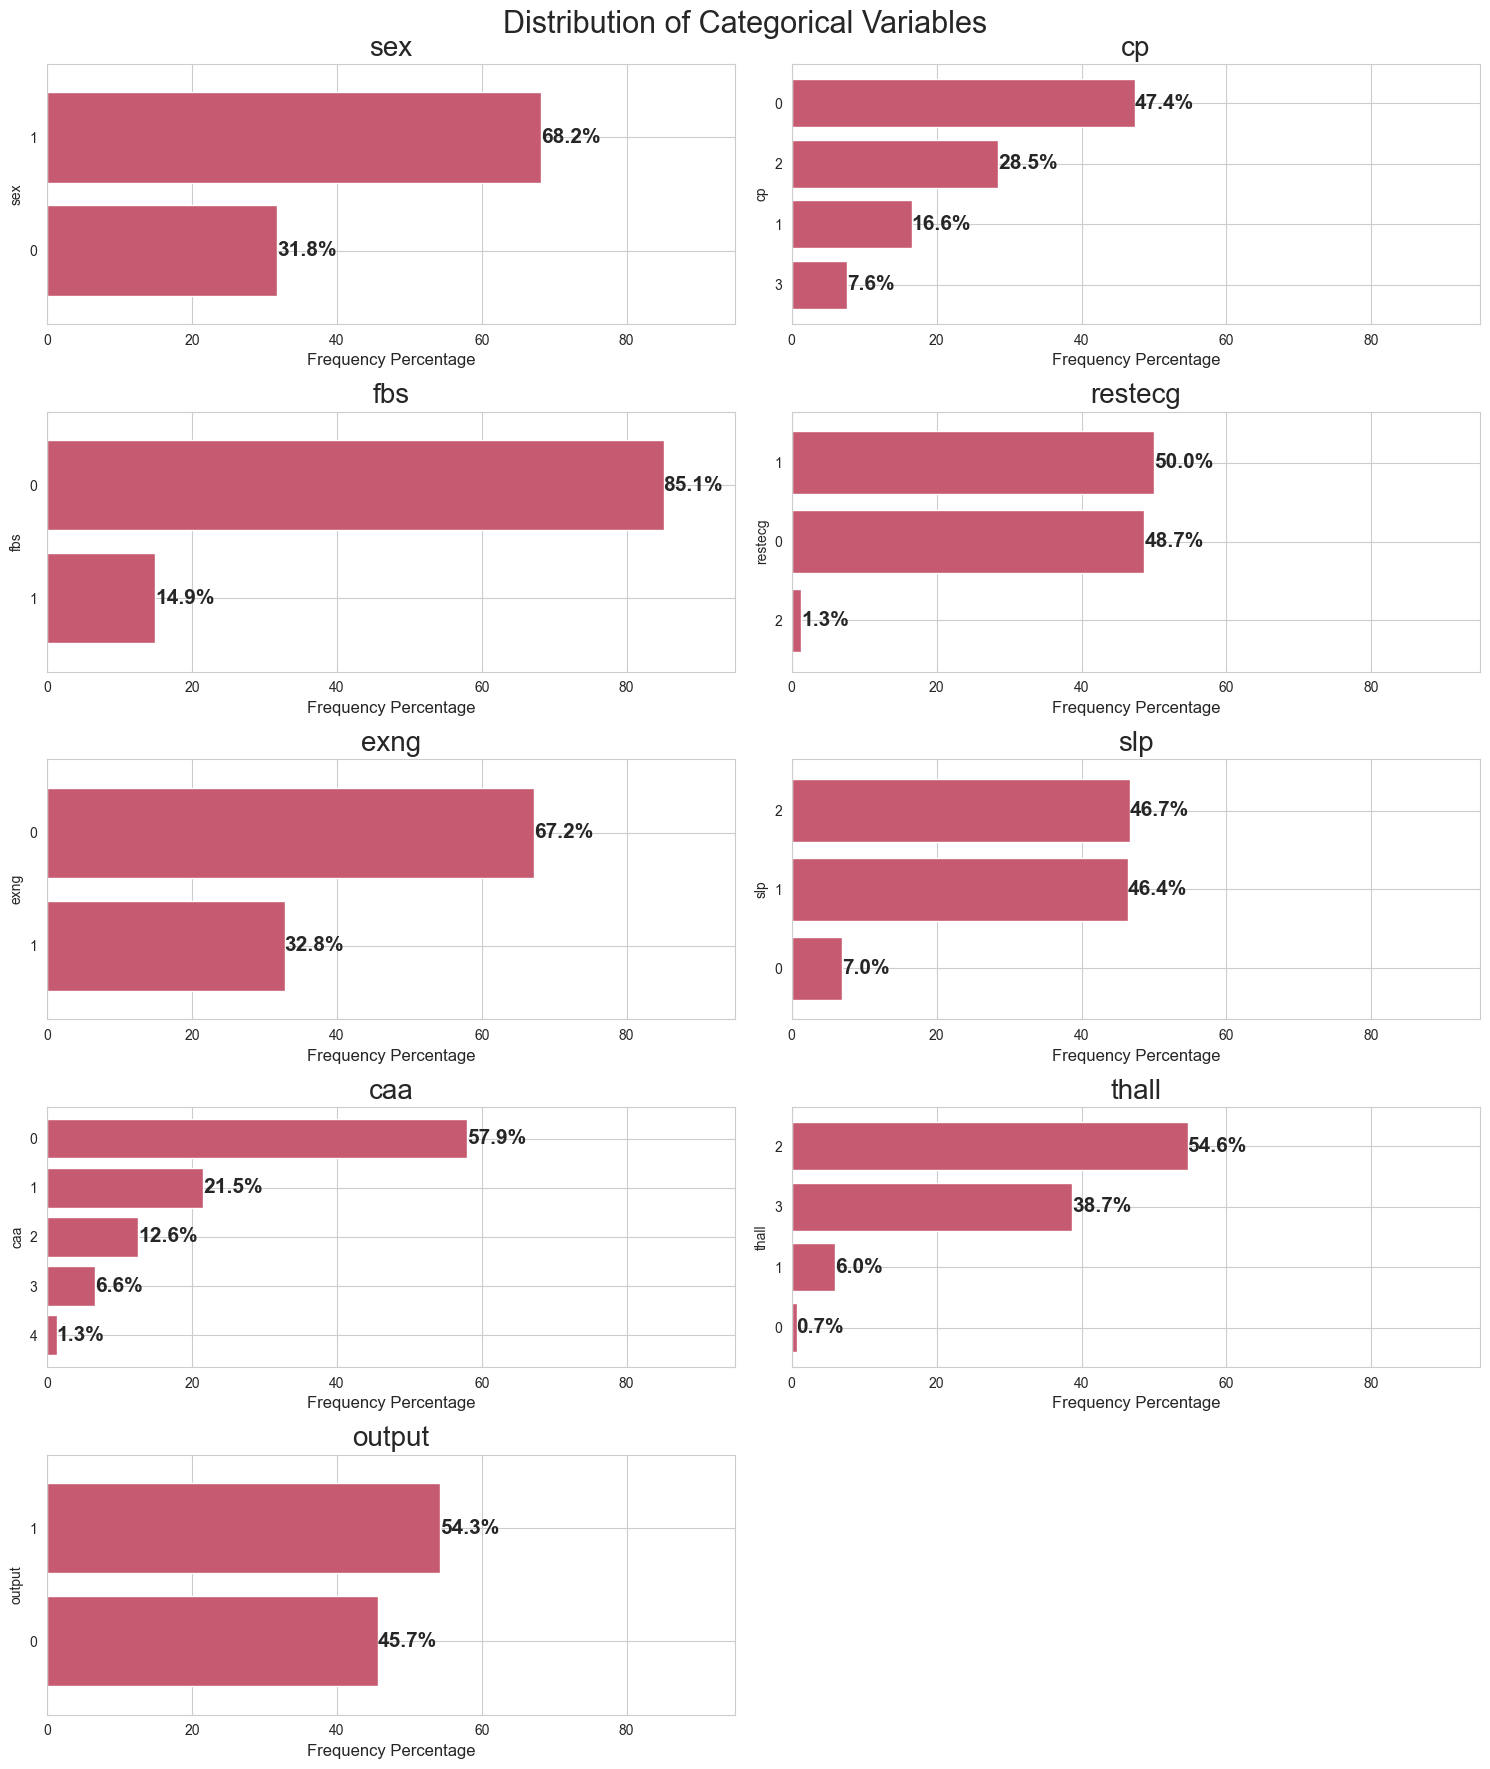

In [12]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = heart[col].value_counts(normalize=True).mul(100).sort_values()
    

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='#C55A71')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

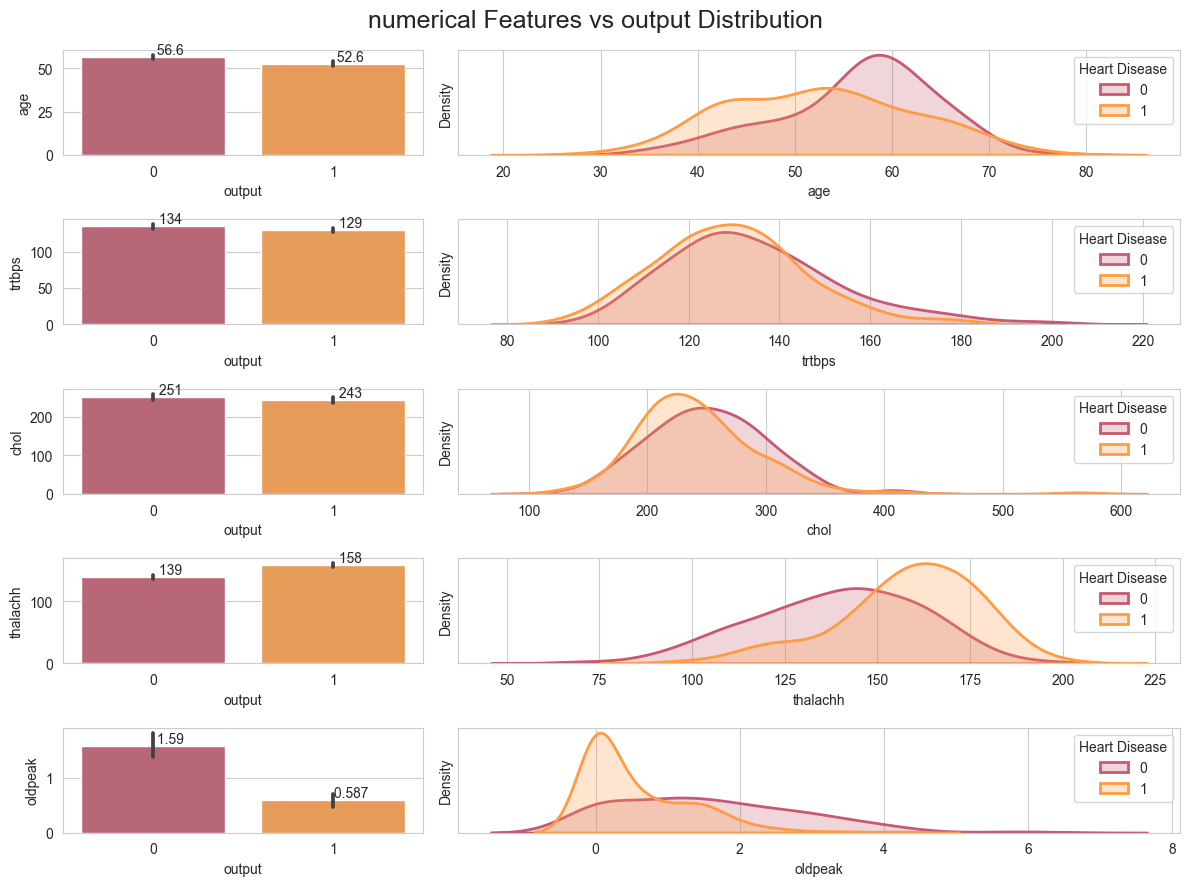

In [13]:
# Set color palette
sns.set_palette(['#C55A71', '#FF9B42'])

# Create the subplots
fig, ax = plt.subplots(len(numerical_features), 2, figsize=(12,9), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(numerical_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=heart, x="output", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=heart[heart["output"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=heart[heart["output"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('numerical Features vs output Distribution', fontsize=18)
plt.tight_layout()                     
plt.show()

<Axes: >

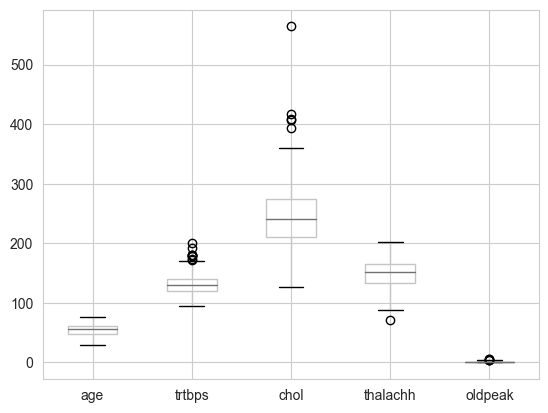

In [14]:
#boxplot visualization
heart.boxplot()

In [15]:
outliers_detected =[ 'age','trtbps', 'chol', 'fbs', 'restecg', 'thalachh','oldpeak', 'caa', 'thall', ]

In [16]:
for c in outliers_detected:
    Q1 = heart[outliers_detected].quantile(0.25)
    Q3 = heart[outliers_detected].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count_specified = ((heart[outliers_detected] < (Q1 - 1.5 * IQR)) | (heart[outliers_detected] > (Q3 + 1.5 * IQR))).sum()

    outliers_count_specified

In [17]:
outliers_count_specified

age          0
trtbps       9
chol         5
fbs         45
restecg      0
thalachh     1
oldpeak      5
caa         24
thall        2
dtype: int64

In [18]:
#numerical features
numerical_features = ['age','trtbps', 'chol', 'thalachh','oldpeak' ]

# Identify the numerical features to be converted to object d.type

convert = [feature for feature in heart.columns if feature not in numerical_features]

# Convert the numerical features to object data type
heart[convert] = heart[convert].astype('int64','float')



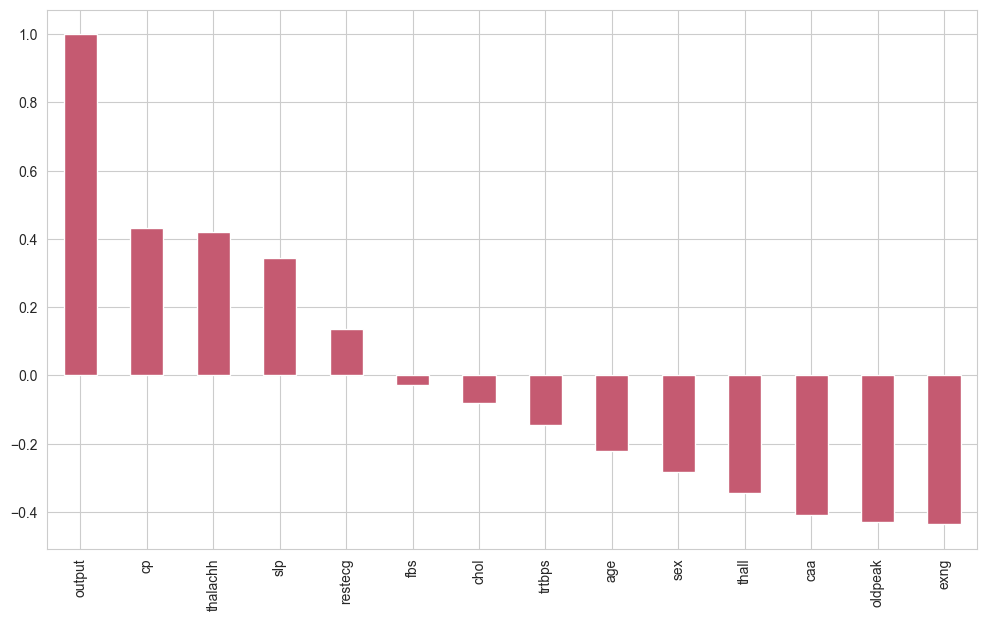

In [19]:
#correlation plt

plt.figure(figsize=(12,7))
correlations = heart.corr()
correlations['output'].sort_values(ascending = False).plot(kind='bar');

# Machine Learning Model

Spliting the dataset for model training

In [20]:
#split the dataset
X = heart.drop(['output'], axis=1)
Y = heart['output']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions=dtc.predict(X_test)

Result

In [22]:
#print the result
print("Accuracy Score :",accuracy_score(y_test,predictions))
print("Classification Report \n",classification_report(y_test,predictions))

Accuracy Score : 0.7868852459016393
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



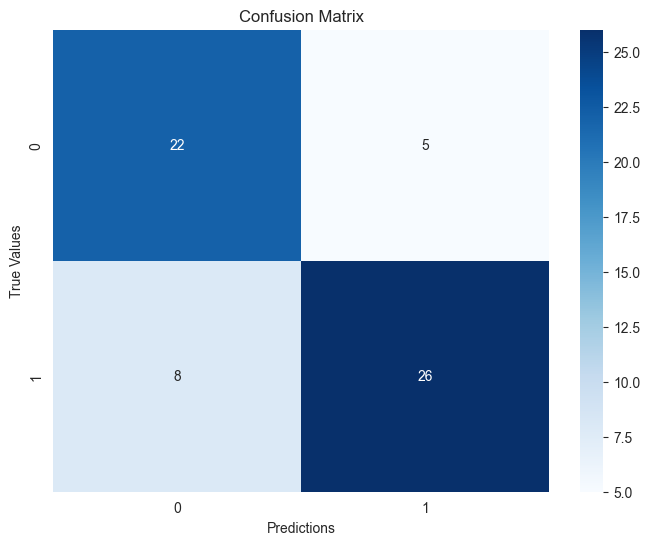

In [23]:
#print the result 

cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

# KNN (K- Nearest Neighbors)Algorithm.

 This algorithm can be applied to both classification and regression problems.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [25]:
accuracy = accuracy_score(y_test, y_test)
print("Accuracy:", train_accuracy[i])
print("test accuracy:", test_accuracy[i])

Accuracy: 0.7427385892116183
test accuracy: 0.639344262295082


In [26]:
train_accuracy

array([1.        , 0.80912863, 0.78838174, 0.78423237, 0.78838174,
       0.74273859])

In [27]:
test_accuracy

array([0.59016393, 0.52459016, 0.59016393, 0.57377049, 0.59016393,
       0.63934426])

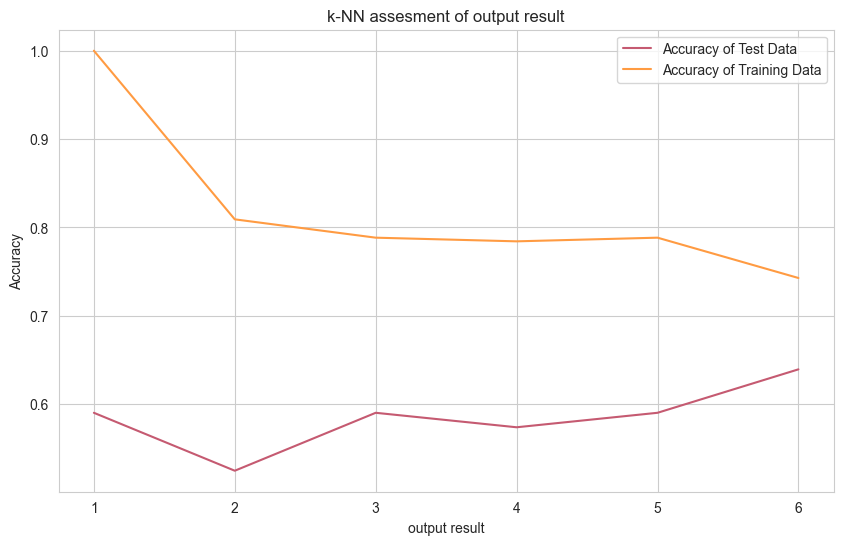

In [28]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of output result')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('output result')
plt.ylabel('Accuracy')
plt.show()

Using Cross Validation to Get the Best Value of k

In [29]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

We can plot the results with the following code

Text(0, 0.5, 'Accuracy Score')

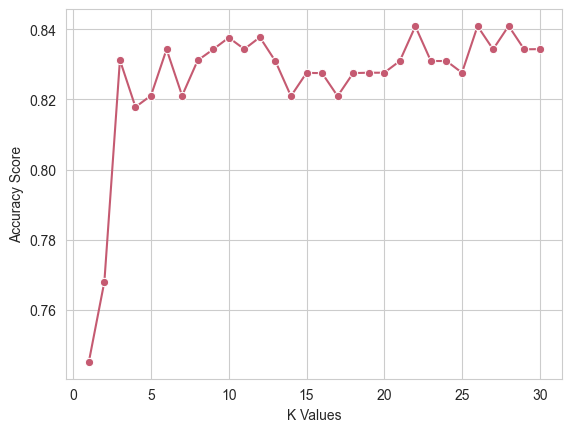

In [30]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

We can see from our chart that k = 23, 26, 28, And 12 all have an accuracy score of just under 85%. As these are tied for the best score, it is advisable to use a smaller value for k. This is because when using higher values of k, the model will use more data points that are further away from the original. Another option would be to explore other evaluation metrics.

# Random Forest Model
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees

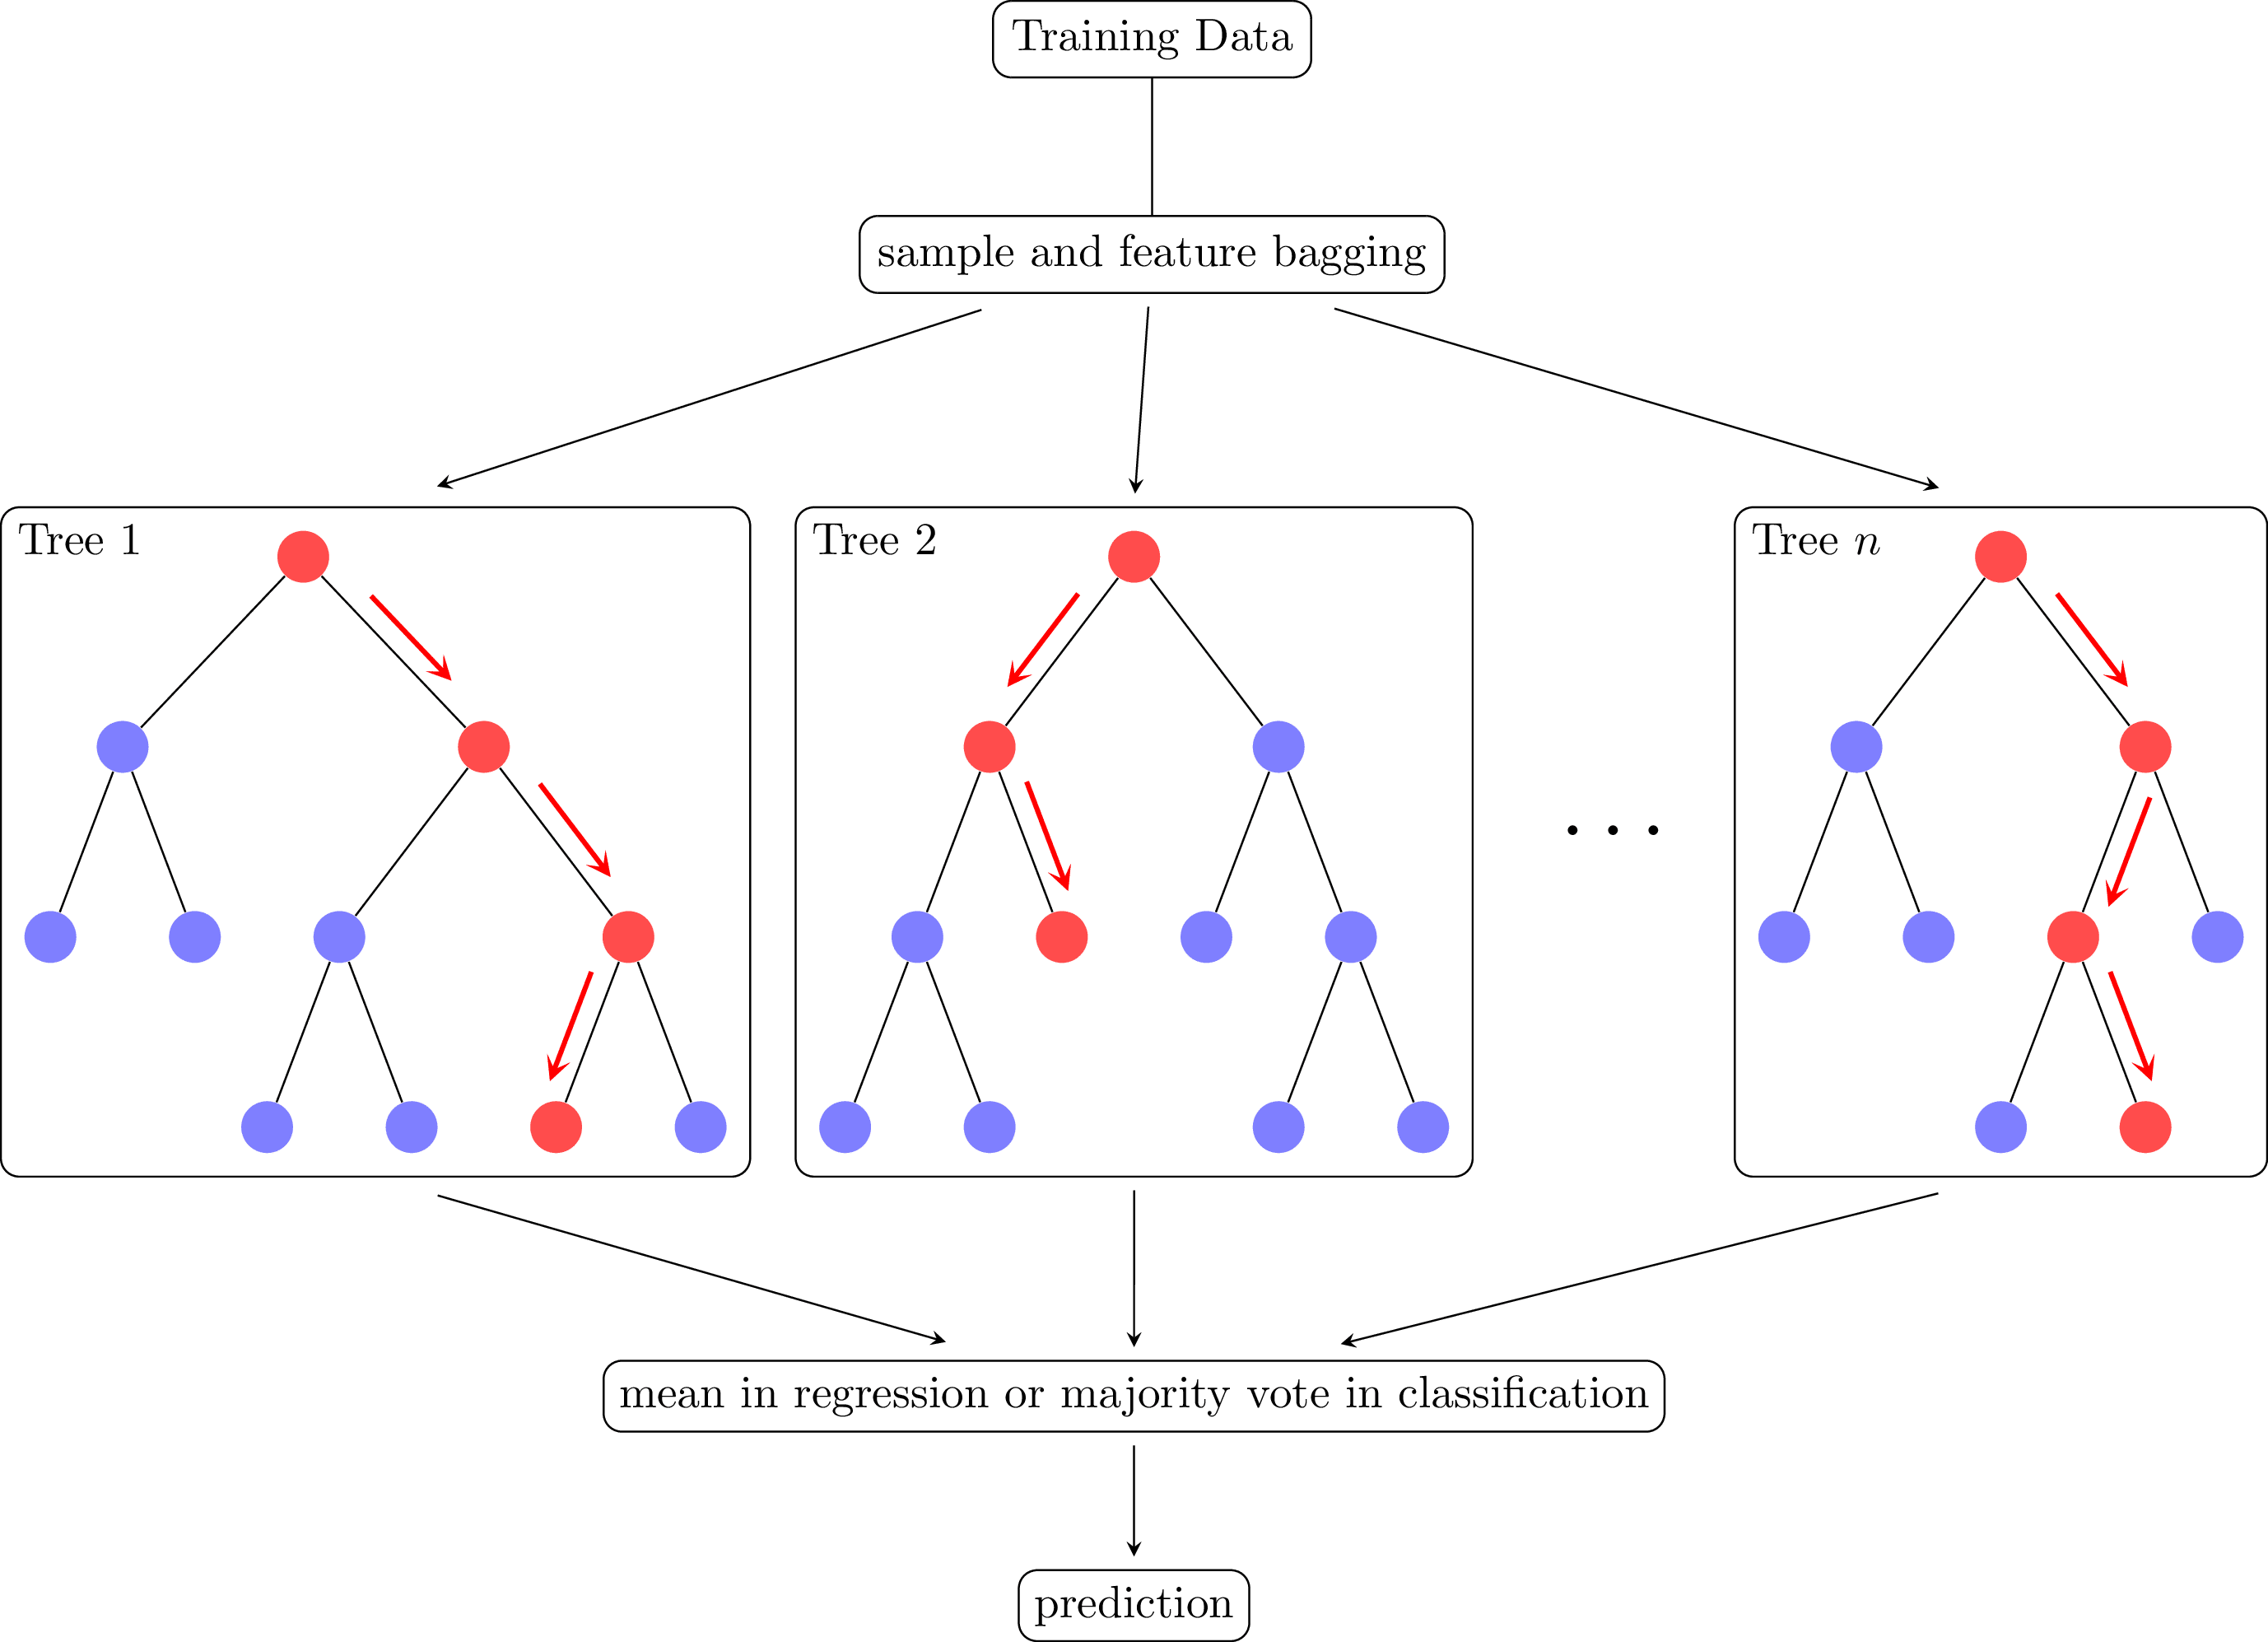

In [31]:

# split the dataset into Features and target
X = heart.drop(columns=['output'])
y = heart['output']

X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.metrics import r2_score
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(X_train,Y_train)
                                                      
from sklearn.ensemble import RandomForestClassifier

x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train,smote_target)
y_pred_rf = rfc.predict(x_test)

print('accuracy on test data',metrics.accuracy_score(y_test,y_pred_rf))

accuracy on test data 0.9672131147540983


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.94      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



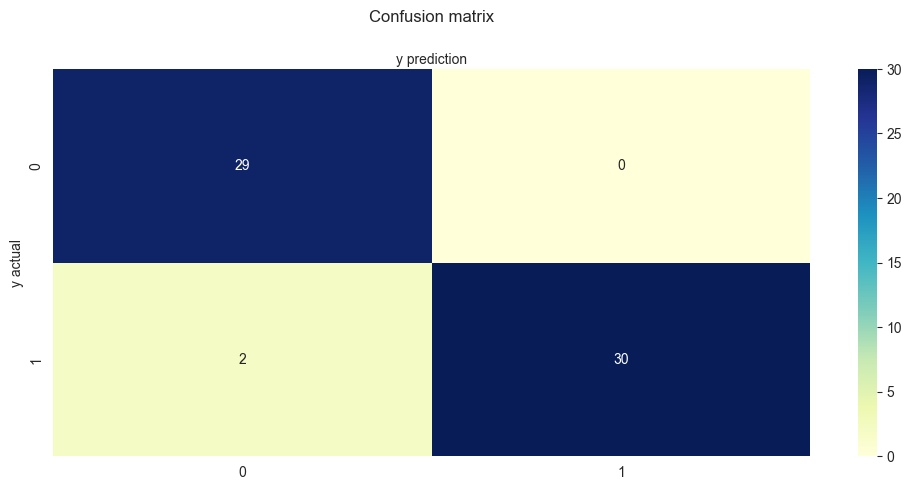

In [33]:
print(metrics.classification_report(y_test, y_pred_rf))

fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()



In [34]:
# Create a random forest classifier
rfc = RandomForestClassifier()

# Train the classifier
rfc.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, rfc.feature_importances_):
    print(feature)

('age', 0.1420539033748464)
('sex', 0.020748162987349904)
('cp', 0.058202953623312084)
('trtbps', 0.1264959955318572)
('chol', 0.17824296690599492)
('fbs', 0.016326690582048)
('restecg', 0.031153840081507133)
('thalachh', 0.1521933229590719)
('exng', 0.021853825027462265)
('oldpeak', 0.10885379603925793)
('slp', 0.044338457119974174)
('caa', 0.05288441343110572)
('thall', 0.046651672336212445)


In [36]:
r2_score(y_test, y_pred_rf)

0.8685344827586207

## Build a Predictive system base on train data

In [ ]:
input_data = (58,0,0,155,258,0,0,160,0,0.2,6,0,2)

#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The person does not have heart problem")
else:
    print("The person has heart problem")

[0]
The person does not have heart problem
